1                 NaT
8     0 days 00:43:00
15    0 days 00:01:00
22    0 days 00:16:00
29    0 days 00:02:00
            ...      
743   0 days 00:02:00
750   0 days 00:00:00
757   0 days 00:02:00
764   0 days 00:01:00
0                 NaT
Name: Delay, Length: 111, dtype: timedelta64[ns]


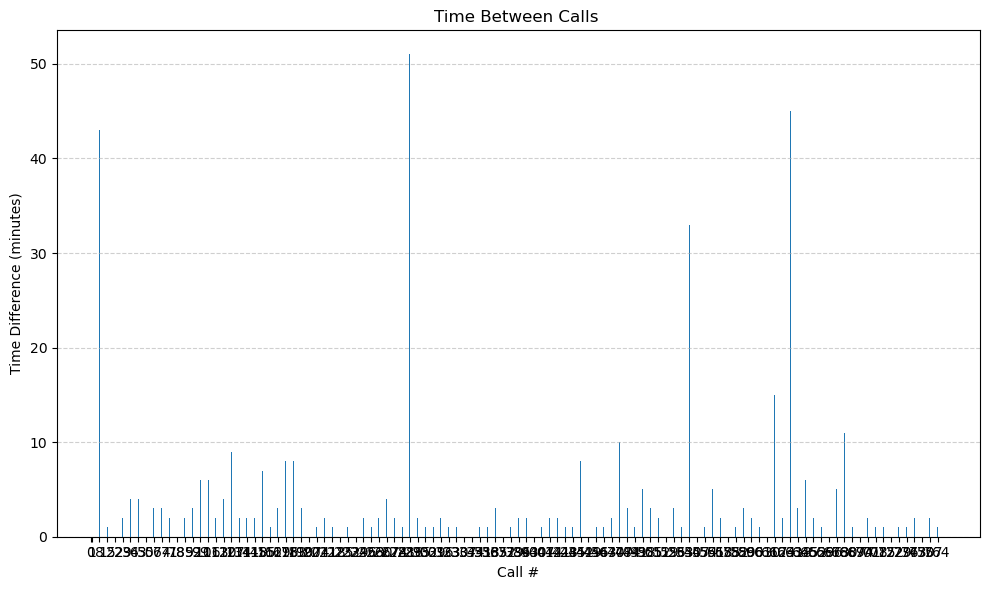

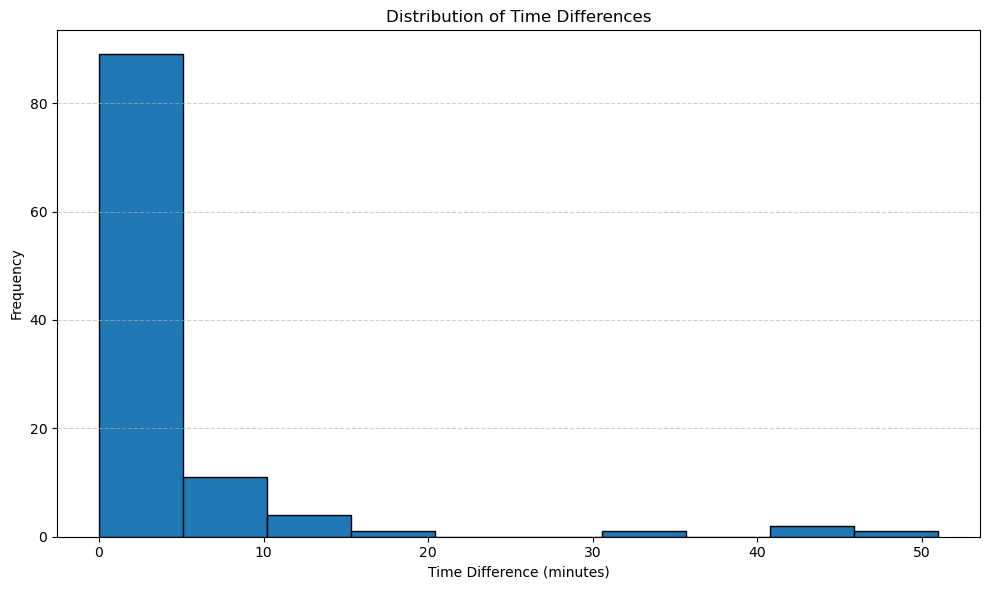

In [10]:
#Used to parse VS CRM call log and check for slacking!

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/robertwrobel/Downloads/kg2.csv')
df = df.iloc[1::7]  
df['Updated'] = df['Updated'] + "m"

def convert_to_datetime(time_str):
  return datetime.strptime(time_str, "%I:%M%p")

df['Time'] = df['Updated'].apply(convert_to_datetime)

df['Delay'] = df['Time'].diff()
df.loc[0, 'Delay'] = pd.NaT  
print(df['Delay'])

df['Delay2'] = df['Delay'].dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Delay2'])
plt.xlabel('Call #')
plt.ylabel('Time Difference (minutes)')
plt.title('Time Between Calls ')
plt.xticks(df.index)  
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.hist(df['Delay2'], bins=10, edgecolor='black')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()